In [70]:
import pandas as pd

input_path = "data/SEC_Isolation/"
output_path = input_path + "processed/"
df_multi_group = pd.read_excel(input_path + "ST3730_Proj_155_2_AG_Nazarenko_Ftest_limma.xlsx") 
df_multi_group

,Log2 fold change EV/Ctrl,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
0,3.973732,0.586486,4.560219,19.963035,41.994997,0.000006,0.003510,P02656,APOC3,Apolipoprotein C-III
1,3.857296,0.009573,3.866869,17.221318,42.838935,0.000011,0.003510,P00750,PLAT,Tissue-type plasminogen activator;Tissue-type ...
2,-2.270411,-1.198889,-3.469300,17.028292,39.936745,0.000061,0.012761,O43854,EDIL3,EGF-like repeat and discoidin I-like domain-co...
3,-2.024620,-0.589106,-2.613726,19.255645,20.980838,0.000165,0.022620,P23229,ITGA6,Integrin alpha-6;Integrin alpha-6 heavy chain;...
4,1.870246,-0.547139,1.323107,17.647121,20.441664,0.000186,0.022620,P02786,TFRC,Transferrin receptor protein 1;Transferrin rec...
...,...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,NaN,14.336699,NaN,NaN,NaN,P36894,BMPR1A,Bone morphogenetic protein receptor type-1A
821,0.088537,NaN,NaN,14.883324,NaN,NaN,NaN,Q12792,TWF1,Twinfilin-1
822,NaN,0.194251,NaN,14.771649,NaN,NaN,NaN,P34897,SHMT2,"Serine hydroxymethyltransferase, mitochondrial"
823,NaN,0.796220,NaN,14.663725,NaN,NaN,NaN,P38919,EIF4A3,Eukaryotic initiation factor 4A-III;Eukaryotic...


In [71]:
df_multi_group_t8 = df_multi_group.iloc[:, 1:]
df_multi_group_t8

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
0,0.586486,4.560219,19.963035,41.994997,0.000006,0.003510,P02656,APOC3,Apolipoprotein C-III
1,0.009573,3.866869,17.221318,42.838935,0.000011,0.003510,P00750,PLAT,Tissue-type plasminogen activator;Tissue-type ...
2,-1.198889,-3.469300,17.028292,39.936745,0.000061,0.012761,O43854,EDIL3,EGF-like repeat and discoidin I-like domain-co...
3,-0.589106,-2.613726,19.255645,20.980838,0.000165,0.022620,P23229,ITGA6,Integrin alpha-6;Integrin alpha-6 heavy chain;...
4,-0.547139,1.323107,17.647121,20.441664,0.000186,0.022620,P02786,TFRC,Transferrin receptor protein 1;Transferrin rec...
...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,14.336699,NaN,NaN,NaN,P36894,BMPR1A,Bone morphogenetic protein receptor type-1A
821,NaN,NaN,14.883324,NaN,NaN,NaN,Q12792,TWF1,Twinfilin-1
822,0.194251,NaN,14.771649,NaN,NaN,NaN,P34897,SHMT2,"Serine hydroxymethyltransferase, mitochondrial"
823,0.796220,NaN,14.663725,NaN,NaN,NaN,P38919,EIF4A3,Eukaryotic initiation factor 4A-III;Eukaryotic...


In [72]:
df_p_val_corrected = df_multi_group_t8[df_multi_group_t8["p value"] < 0.05]
df_p_val_corrected, df_p_val_corrected.columns 

(    Log2 fold change T8/EV  Log2 fold change T8/Ctrl  Average Expression  \
 0                 0.586486                  4.560219           19.963035   
 1                 0.009573                  3.866869           17.221318   
 2                -1.198889                 -3.469300           17.028292   
 3                -0.589106                 -2.613726           19.255645   
 4                -0.547139                  1.323107           17.647121   
 ..                     ...                       ...                 ...   
 88               -0.252476                 -1.102634           17.151757   
 89                0.571253                  1.122640           20.111335   
 90               -1.566609                 -0.612177           18.002197   
 91               -0.766520                  0.041491           19.119919   
 92                0.510499                  1.417649           16.543955   
 
        F test   p value  adjusted p value Protein Gene name  \
 0   41.99

In [73]:
log2FC_threshold = 1 
df_t8_ev_upregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/EV"] >= log2FC_threshold]
df_t8_ev_upregulated = df_t8_ev_upregulated.sort_values(by="Log2 fold change T8/EV", ascending=False)
df_t8_ev_upregulated.to_csv(output_path + "T8-EV-Upregulated.csv", sep="\t", index=None)
df_t8_ev_upregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
22,2.306212,2.228074,15.616619,10.437675,0.004343,0.114313,P02545,LMNA,Prelamin-A/C;Lamin-A/C
70,2.158973,1.704922,16.190026,5.391882,0.032177,0.283182,P15924,DSP,Desmoplakin
52,1.599686,-0.676830,16.912370,7.935334,0.019733,0.225587,P62834,RAP1A,Ras-related protein Rap-1A
74,1.199872,1.308134,16.238337,4.953498,0.034811,0.289730,P04080,CSTB,Cystatin-B
9,1.052277,2.496246,16.204245,18.578896,0.000597,0.036447,Q86VP6,CAND1,Cullin-associated NEDD8-dissociated protein 1
57,1.051997,1.939565,15.202514,7.711561,0.021021,0.225587,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...


In [74]:
df_t8_ev_downregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/EV"] < -log2FC_threshold]
df_t8_ev_downregulated = df_t8_ev_downregulated.sort_values(by="Log2 fold change T8/EV", ascending=False)
df_t8_ev_downregulated.to_csv(output_path + "T8-EV-Downregulated.csv", sep="\t", index=None)
df_t8_ev_downregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
60,-1.018371,-0.165246,19.443934,5.486022,0.021912,0.225587,P62424,RPL7A,60S ribosomal protein L7a
49,-1.050624,-0.235263,16.802649,5.791609,0.018822,0.225587,P55290,CDH13,Cadherin-13
30,-1.088242,-1.673130,20.453391,8.098550,0.006715,0.133804,P10124,SRGN,Serglycin
68,-1.102354,-0.984942,18.097875,4.836835,0.030704,0.279454,P49006,MARCKSL1,MARCKS-related protein
63,-1.185262,0.147039,16.962448,5.317752,0.026283,0.257898,P62906,RPL10A,60S ribosomal protein L10a
13,-1.191028,1.315058,15.701404,14.936458,0.001308,0.058659,Q14517,FAT1,"Protocadherin Fat 1;Protocadherin Fat 1, nucle..."
2,-1.198889,-3.469300,17.028292,39.936745,0.000061,0.012761,O43854,EDIL3,EGF-like repeat and discoidin I-like domain-co...
69,-1.218929,-0.512818,19.085009,4.782081,0.031621,0.283182,Q5TEC6,HIST2H3PS2,Histone H3
14,-1.235824,-1.199244,18.540050,11.575781,0.001897,0.079420,Q14764,MVP,Major vault protein
90,-1.566609,-0.612177,18.002197,3.992240,0.049218,0.329015,Q969P0,IGSF8,Immunoglobulin superfamily member 8


In [75]:
df_t8_ctrl_upregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/Ctrl"] >= log2FC_threshold]
df_t8_ctrl_upregulated = df_t8_ctrl_upregulated.sort_values(by="Log2 fold change T8/Ctrl", ascending=False)
df_t8_ctrl_upregulated.to_csv(output_path + "T8-Control-Upregulated.csv", sep="\t", index=None)
df_t8_ctrl_upregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
0,0.586486,4.560219,19.963035,41.994997,0.000006,0.003510,P02656,APOC3,Apolipoprotein C-III
1,0.009573,3.866869,17.221318,42.838935,0.000011,0.003510,P00750,PLAT,Tissue-type plasminogen activator;Tissue-type ...
9,1.052277,2.496246,16.204245,18.578896,0.000597,0.036447,Q86VP6,CAND1,Cullin-associated NEDD8-dissociated protein 1
22,2.306212,2.228074,15.616619,10.437675,0.004343,0.114313,P02545,LMNA,Prelamin-A/C;Lamin-A/C
57,1.051997,1.939565,15.202514,7.711561,0.021021,0.225587,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...
53,-0.178621,1.817561,16.183988,7.123735,0.019816,0.225587,Q96EY5,MVB12A,Multivesicular body subunit 12A
70,2.158973,1.704922,16.190026,5.391882,0.032177,0.283182,P15924,DSP,Desmoplakin
19,-0.504107,1.636669,17.494071,10.129182,0.003807,0.113584,O75367;Q9P0M6,H2AFY,Core histone macro-H2A.1
33,0.389043,1.563560,15.470248,8.370381,0.008558,0.156996,P13489,RNH1,Ribonuclease inhibitor
17,0.534620,1.547305,16.720385,10.880450,0.002980,0.103957,O43707;Q08043;Q9H254,ACTN4,Alpha-actinin-4


In [76]:
df_t8_ctrl_downregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/Ctrl"] < -log2FC_threshold]
df_t8_ctrl_downregulated = df_t8_ctrl_downregulated.sort_values(by='Log2 fold change T8/Ctrl', ascending=True)
df_t8_ctrl_downregulated.to_csv(output_path + "T8-Control-Downregulated.csv", sep="\t", index=None)
df_t8_ctrl_downregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
2,-1.198889,-3.469300,17.028292,39.936745,0.000061,0.012761,O43854,EDIL3,EGF-like repeat and discoidin I-like domain-co...
3,-0.589106,-2.613726,19.255645,20.980838,0.000165,0.022620,P23229,ITGA6,Integrin alpha-6;Integrin alpha-6 heavy chain;...
5,-0.584746,-2.215289,21.336907,19.739702,0.000216,0.022620,P05067,APP,Amyloid beta A4 protein;N-APP;Soluble APP-alph...
12,0.200426,-2.200632,18.079217,12.851524,0.001271,0.058659,O95084,PRSS23,Serine protease 23
8,-0.544650,-2.106639,16.966594,20.220489,0.000436,0.030448,Q03405,PLAUR,Urokinase plasminogen activator surface receptor
10,-0.662626,-2.000216,21.813006,15.272781,0.000638,0.036447,P15144,ANPEP,Aminopeptidase N
27,-0.478455,-1.941083,21.658002,8.791214,0.005097,0.114313,P07996,THBS1,Thrombospondin-1
51,-0.927563,-1.857384,17.918786,5.716580,0.019530,0.225587,Q9Y2J2;P11171,EPB41L3,Band 4.1-like protein 3;Band 4.1-like protein ...
18,-0.735016,-1.706897,16.892597,9.613430,0.003736,0.113584,P54289;Q9NY47,CACNA2D1,Voltage-dependent calcium channel subunit alph...
30,-1.088242,-1.673130,20.453391,8.098550,0.006715,0.133804,P10124,SRGN,Serglycin


In [77]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))


def plot_differential_genes(df, name, fc_colname):
    
    df["A"] = df["Average Expression"]
    df["M"] = df[fc_colname]
    
    
    plt.scatter(df["A"], df["M"], alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")  # Reference line at M=0
    
    # Annotate points exceeding threshold
    for i, row in df.iterrows():
        if row["Gene name"] is not np.nan:
            plt.annotate(row["Gene name"], (row["A"], row["M"]), fontsize=9, alpha=0.8)
        else:
            plt.annotate(row["Protein"], (row["A"], row["M"]), fontsize=9, alpha=0.8)

    plt.xlabel("A (Mean Expression)")
    plt.ylabel("M (Log2 Fold Change)")
    plt.title("{}: MA Plot for {}".format("SEC Isolation: ", name))
    plt.grid(True)
    plt.savefig(output_path + "{}_MA_plot_for_{}.png".format("SEC_isolation", name), dpi=300)
    plt.show()

<Figure size 1500x1200 with 0 Axes>

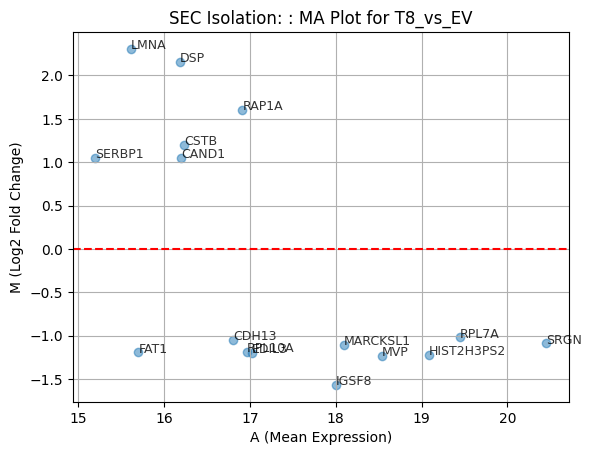

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name,A,M
22,2.306212,2.228074,15.616619,10.437675,0.004343,0.114313,P02545,LMNA,Prelamin-A/C;Lamin-A/C,15.616619,2.306212
70,2.158973,1.704922,16.190026,5.391882,0.032177,0.283182,P15924,DSP,Desmoplakin,16.190026,2.158973
52,1.599686,-0.676830,16.912370,7.935334,0.019733,0.225587,P62834,RAP1A,Ras-related protein Rap-1A,16.912370,1.599686
74,1.199872,1.308134,16.238337,4.953498,0.034811,0.289730,P04080,CSTB,Cystatin-B,16.238337,1.199872
9,1.052277,2.496246,16.204245,18.578896,0.000597,0.036447,Q86VP6,CAND1,Cullin-associated NEDD8-dissociated protein 1,16.204245,1.052277
57,1.051997,1.939565,15.202514,7.711561,0.021021,0.225587,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...,15.202514,1.051997
60,-1.018371,-0.165246,19.443934,5.486022,0.021912,0.225587,P62424,RPL7A,60S ribosomal protein L7a,19.443934,-1.018371
49,-1.050624,-0.235263,16.802649,5.791609,0.018822,0.225587,P55290,CDH13,Cadherin-13,16.802649,-1.050624
30,-1.088242,-1.673130,20.453391,8.098550,0.006715,0.133804,P10124,SRGN,Serglycin,20.453391,-1.088242
68,-1.102354,-0.984942,18.097875,4.836835,0.030704,0.279454,P49006,MARCKSL1,MARCKS-related protein,18.097875,-1.102354


In [78]:
df_t8_ev_differential_genes = pd.concat([df_t8_ev_upregulated, df_t8_ev_downregulated])
plot_differential_genes(df_t8_ev_differential_genes, "T8_vs_EV", "Log2 fold change T8/EV")
df_t8_ev_differential_genes



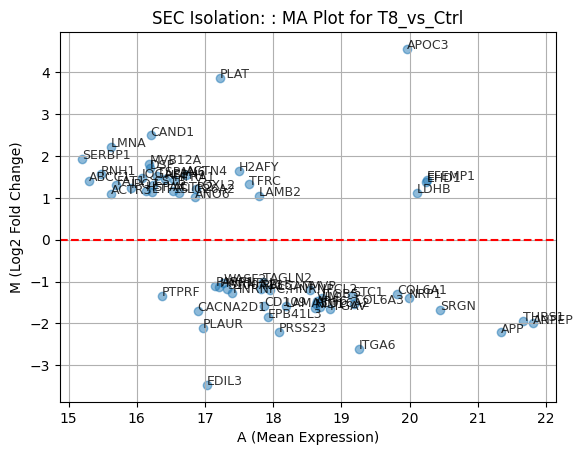

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name,A,M
0,0.586486,4.560219,19.963035,41.994997,0.000006,0.003510,P02656,APOC3,Apolipoprotein C-III,19.963035,4.560219
1,0.009573,3.866869,17.221318,42.838935,0.000011,0.003510,P00750,PLAT,Tissue-type plasminogen activator;Tissue-type ...,17.221318,3.866869
9,1.052277,2.496246,16.204245,18.578896,0.000597,0.036447,Q86VP6,CAND1,Cullin-associated NEDD8-dissociated protein 1,16.204245,2.496246
22,2.306212,2.228074,15.616619,10.437675,0.004343,0.114313,P02545,LMNA,Prelamin-A/C;Lamin-A/C,15.616619,2.228074
57,1.051997,1.939565,15.202514,7.711561,0.021021,0.225587,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...,15.202514,1.939565
...,...,...,...,...,...,...,...,...,...,...,...
42,0.018782,-1.172030,17.321608,7.258700,0.011016,0.160891,Q99584,S100A13,Protein S100-A13,17.321608,-1.172030
28,-0.239819,-1.128406,17.211033,8.565307,0.005568,0.120575,Q00839,HNRNPU,Heterogeneous nuclear ribonucleoprotein U,17.211033,-1.128406
88,-0.252476,-1.102634,17.151757,4.299156,0.048213,0.329015,P09874,PARP1,Poly [ADP-ribose] polymerase 1,17.151757,-1.102634
78,-0.516790,-1.039486,17.266964,4.668786,0.036464,0.289864,Q9Y6W5,WASF2,Wiskott-Aldrich syndrome protein family member 2,17.266964,-1.039486


In [79]:
df_t8_ctrl_differential_genes = pd.concat([df_t8_ctrl_upregulated, df_t8_ctrl_downregulated])
plot_differential_genes(df_t8_ctrl_differential_genes, "T8_vs_Ctrl", "Log2 fold change T8/Ctrl")
df_t8_ctrl_differential_genes